In [12]:
# Initial imports

from pathlib import Path
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [13]:
df = pd.read_csv('VENAX_daily2.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
df.head(10)

,Close
Date,
2012-01-18 16:00:00,51.79
2012-01-19 16:00:00,51.96
2012-01-20 16:00:00,51.94
2012-01-23 16:00:00,52.35
2012-01-24 16:00:00,52.23
2012-01-25 16:00:00,52.91
2012-01-26 16:00:00,52.07
2012-01-27 16:00:00,52.00
2012-01-30 16:00:00,51.75


In [14]:
df.rename(columns={'Close': 'VENAX close'}, inplace=True)
df

,VENAX close
Date,
2012-01-18 16:00:00,51.79
2012-01-19 16:00:00,51.96
2012-01-20 16:00:00,51.94
2012-01-23 16:00:00,52.35
2012-01-24 16:00:00,52.23
...,...
2024-01-10 16:00:00,56.91
2024-01-11 16:00:00,56.98
2024-01-12 16:00:00,57.71


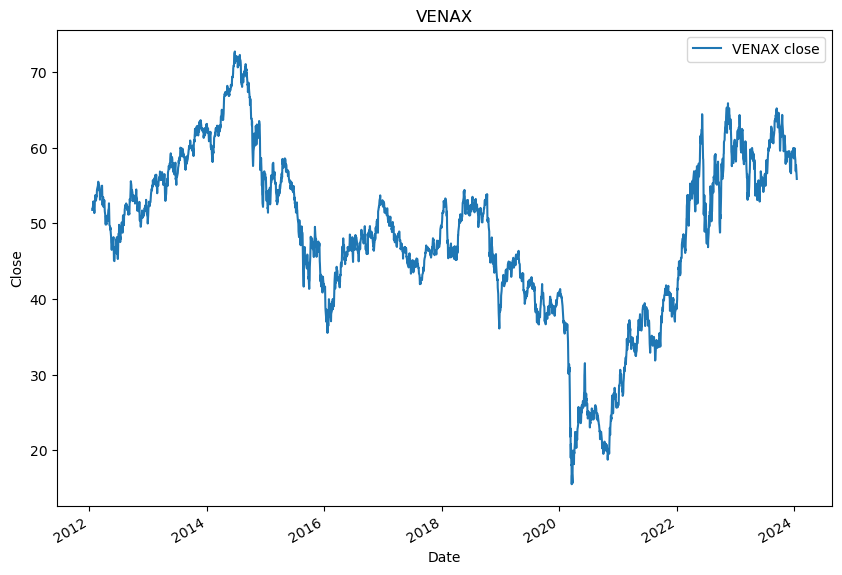

In [18]:
# venax price plot
df.plot(figsize=(10, 7))
plt.title('VENAX')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

In [20]:
#btc csv import
btc_df = pd.read_csv('BTC-USD_daily.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
btc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-20,898.171997,899.398010,887.007996,895.026001,895.026001,86728400
2017-01-21,895.549011,927.367004,895.534973,921.789001,921.789001,111158000
2017-01-22,922.205017,937.525024,897.564026,924.672974,924.672974,116573000
2017-01-23,925.499023,928.265991,916.737976,921.012024,921.012024,73588600
2017-01-24,910.677002,924.145020,892.286011,892.687012,892.687012,111349000


In [22]:
btc_df.drop(columns=['Adj Close','High', 'Low', 'Open', 'Volume'], inplace=True)
btc_df.rename(columns={'Close': 'BTC close'}, inplace=True)
btc_df.head()

,BTC close
Date,
2017-01-20,895.026001
2017-01-21,921.789001
2017-01-22,924.672974
2017-01-23,921.012024
2017-01-24,892.687012


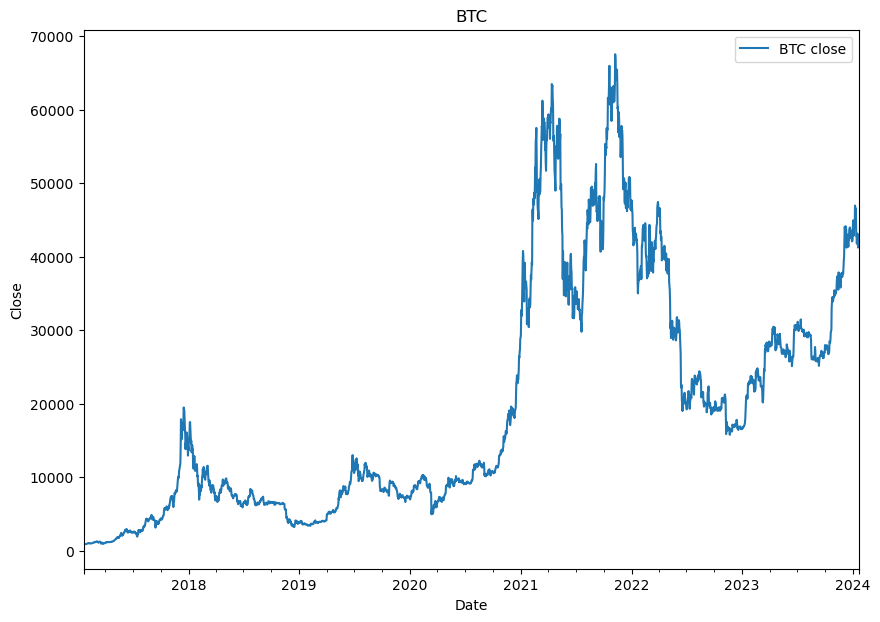

In [24]:
btc_df.plot(figsize=(10, 7))
plt.title('BTC')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

In [30]:
## combined dataframes
combined_df = pd.concat([df, btc_df], axis=1, join='outer').pct_change()
combined_df

,VENAX close,BTC close
Date,,
2012-01-18 16:00:00,NaN,NaN
2012-01-19 16:00:00,0.003282,NaN
2012-01-20 16:00:00,-0.000385,NaN
2012-01-23 16:00:00,0.007894,NaN
2012-01-24 16:00:00,-0.002292,NaN
...,...,...
2024-01-17 00:00:00,0.000000,-0.009554
2024-01-17 16:00:00,-0.008341,0.000000
2024-01-18 00:00:00,0.000000,-0.034640


In [28]:
combined_df = combined_df.pct_change()
combined_df

,VENAX close,BTC close
Date,,
2012-01-18 16:00:00,NaN,NaN
2012-01-19 16:00:00,0.003282,NaN
2012-01-20 16:00:00,-0.000385,NaN
2012-01-23 16:00:00,0.007894,NaN
2012-01-24 16:00:00,-0.002292,NaN
...,...,...
2024-01-17 00:00:00,0.000000,-0.009554
2024-01-17 16:00:00,-0.008341,0.000000
2024-01-18 00:00:00,0.000000,-0.034640


In [35]:
#dropnas
combined_df.dropna(subset=['VENAX close','BTC close'])
combined_df

,VENAX close,BTC close
Date,,
2012-01-18 16:00:00,NaN,NaN
2012-01-19 16:00:00,0.003282,NaN
2012-01-20 16:00:00,-0.000385,NaN
2012-01-23 16:00:00,0.007894,NaN
2012-01-24 16:00:00,-0.002292,NaN
...,...,...
2024-01-17 00:00:00,0.000000,-0.009554
2024-01-17 16:00:00,-0.008341,0.000000
2024-01-18 00:00:00,0.000000,-0.034640


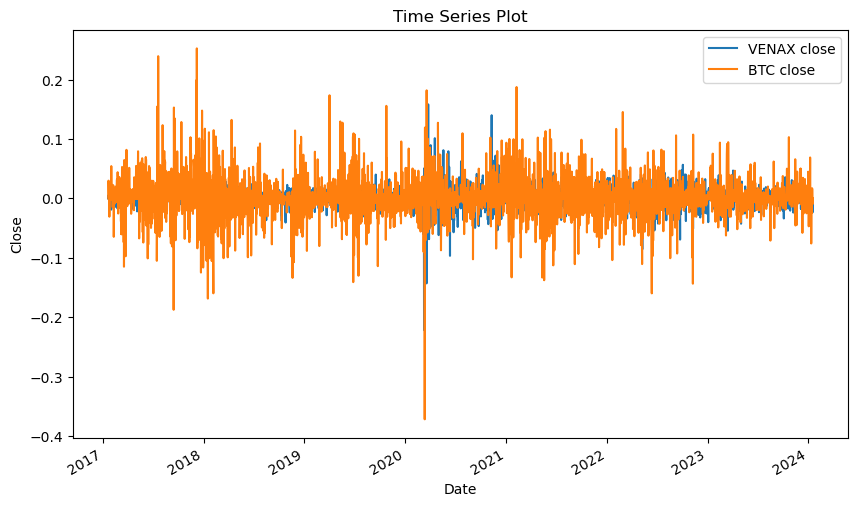

In [43]:
##time series plot
start_date = '2017-01-20'
end_date = '2024-01-17'
selected_df = combined_df.loc[start_date:end_date]

selected_df.plot(figsize=(10, 6))
plt.title(' deviation Plot')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

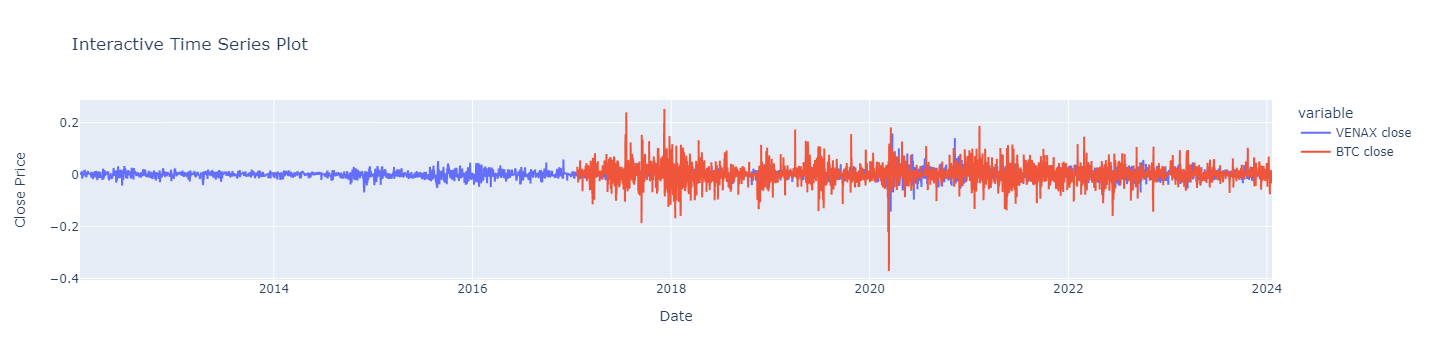

In [54]:
# Time Series Plot#2
start_date = '2017-01-20'
end_date = '2024-01-17'
selected_df = combined_df.loc[start_date:end_date]

fig1 = px.line(combined_df, x=combined_df.index, y=['VENAX close', 'BTC close'], title='Interactive Time Series Plot')
fig1.update_xaxes(title_text='Date')
fig1.update_yaxes(title_text='Close Price')


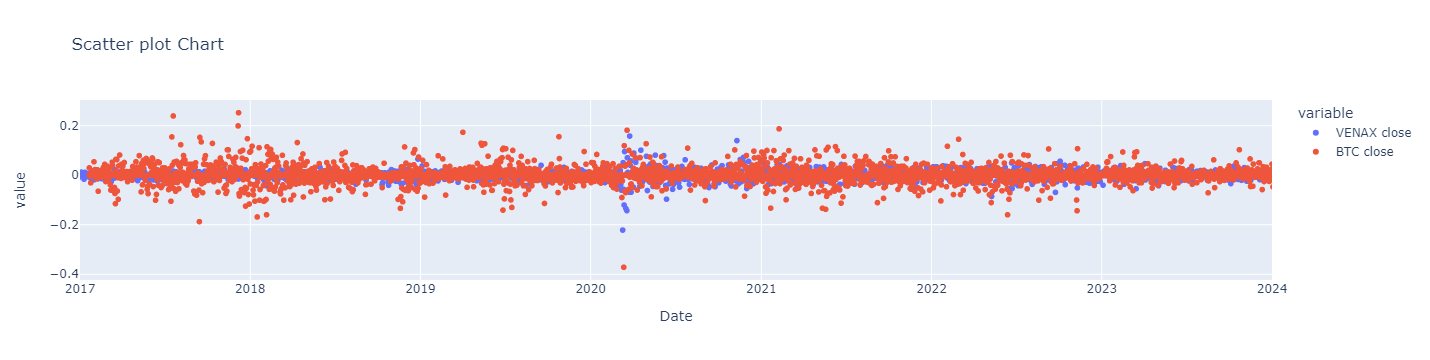

In [60]:
# scatterplot Chart
fig2 = px.scatter(combined_df, x=combined_df.index, y=['VENAX close', 'BTC close'], title='Scatter plot Chart', 
                  labels={'y': 'Close Price'}, range_x=['2017-01-01', '2024-01-01'])
fig2.update_xaxes(title_text='Date')

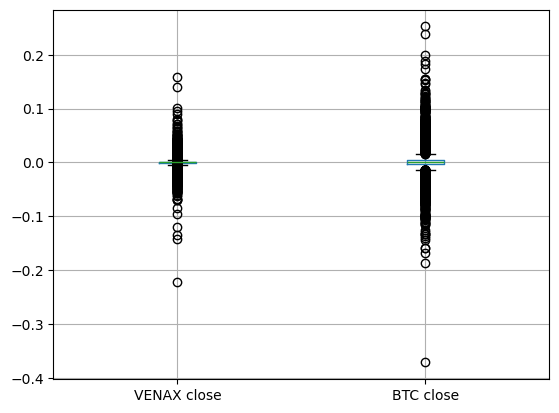

In [62]:
# Box plot to show risk
combined_df.columns = ['VENAX close', 'BTC close']
combined_df.boxplot();


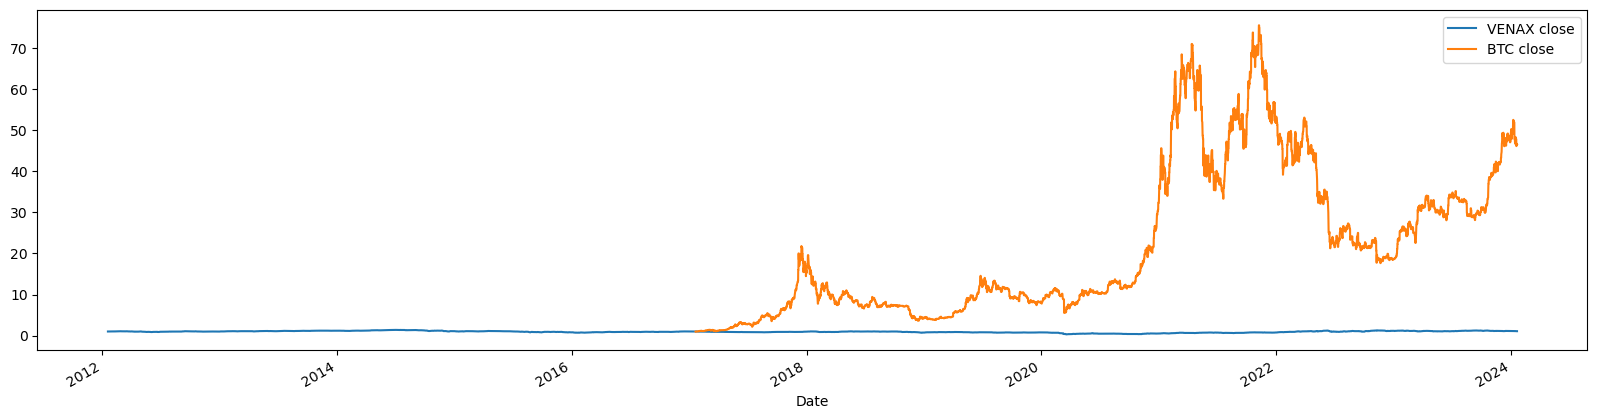

In [95]:
# Calculate cumulative returns of all portfolios
cumulative_df = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_df.plot(figsize=(20,5));

In [97]:
cum_returns_std = cumulative_df.std()
cum_returns_std

VENAX close     0.218971
BTC close      18.109523
dtype: float64

In [99]:
annulized_std = cum_returns_std * np.sqrt(252)
annulized_std

VENAX close      3.476051
BTC close      287.479770
dtype: float64

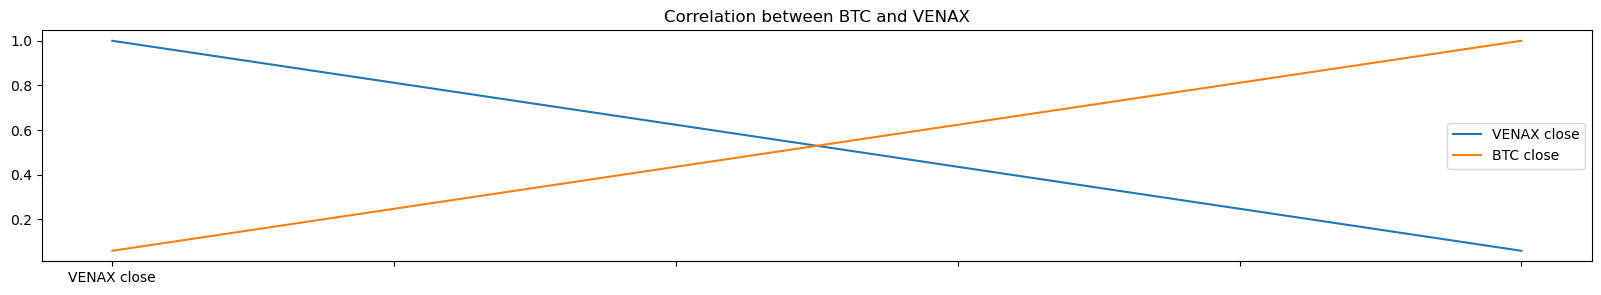

In [103]:
# Calculate the correlation
correlation_matrix = cumulative_df.corr()

correlation_matrix.plot(figsize=(20,3), title='Correlation between BTC and VENAX');